<a href="https://www.kaggle.com/code/bonsoularani/store-analysis?scriptVersionId=173961807" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sales-forecasting/train.csv


In [2]:
df = pd.read_csv('/kaggle/input/sales-forecasting/train.csv')
df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
5,6,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600
6,7,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800
7,8,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520
8,9,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040
9,10,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

### Null Columns

In [4]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [5]:
df['Postal Code'].fillna(0,inplace = True)

df['Postal Code'] = df['Postal Code'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   int64  
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

/tmp/ipykernel_18/879404054.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Postal Code'].fillna(0,inplace = True)


In [6]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9800.000000,9800.000000
mean,4900.500000,55211.280918,230.769059
std,2829.160653,32076.677954,626.651875
min,1.000000,0.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,57551.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


## Data Cleaning

In [7]:
df.duplicated().sum()

0

In [8]:
df.duplicated(keep=False).sum()

0

## Customer Segmentation

In [9]:
#types_of_customers

types_of_customers = df['Segment'].unique()
types_of_customers

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [10]:
#number_of_customers

number_of_customers = df['Segment'].value_counts().reset_index()
number_of_customers = number_of_customers.rename(columns={'Segment':'Customer Type','count':'Total Customers'})

print(number_of_customers)

  Customer Type  Total Customers
0      Consumer             5101
1     Corporate             2953
2   Home Office             1746


In [11]:
import matplotlib.pyplot as plt

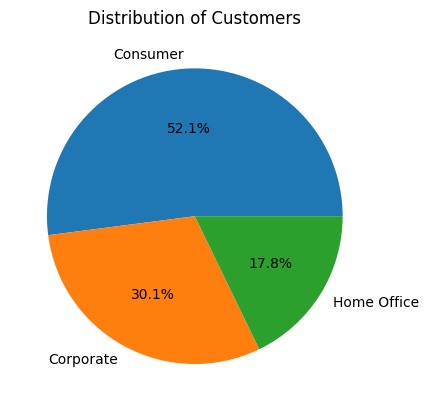

In [12]:
#plotting a pie chart

plt.pie(number_of_customers['Total Customers'], labels = number_of_customers['Customer Type'], autopct='%1.1f%%')

plt.title('Distribution of Customers')

plt.show()

### Customers and Sales

In [13]:
sales_per_category = df.groupby('Segment')['Sales'].sum().reset_index()
sales_per_category = sales_per_category.rename(columns={'Segment': 'Customer Type', 'Sales': 'Total Sales'})
print(sales_per_category)


  Customer Type   Total Sales
0      Consumer  1.148061e+06
1     Corporate  6.884941e+05
2   Home Office  4.249822e+05


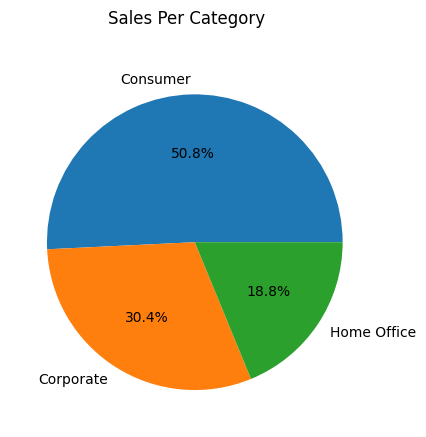

In [14]:
plt.pie(sales_per_category['Total Sales'], labels = sales_per_category['Customer Type'], autopct = '%1.1f%%')

plt.suptitle('Sales Per Category')

plt.show()

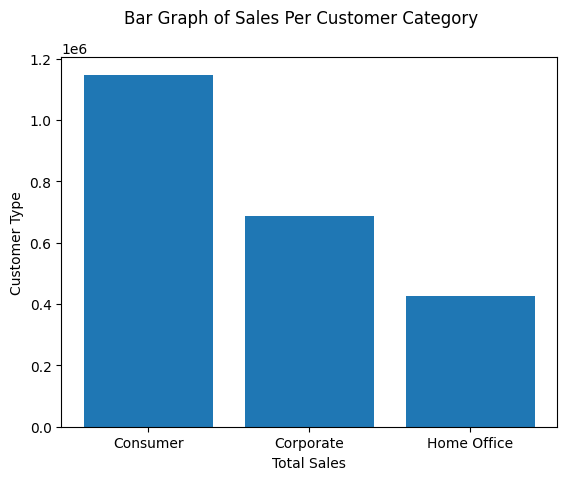

In [15]:
plt.bar(sales_per_category['Customer Type'],sales_per_category['Total Sales'])

plt.suptitle('Bar Graph of Sales Per Customer Category')
plt.ylabel('Customer Type')
plt.xlabel('Total Sales')

plt.show()

### Customer Loyalty

In [16]:
customer_order_freq = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Order ID'].count().reset_index()

#Rename the Order ID
customer_order_freq.rename(columns = {'Order ID':'Total Orders'}, inplace = True)


sorted_repeat_customers = customer_order_freq.sort_values(by = 'Total Orders', ascending = False)


print(sorted_repeat_customers.head(10))

    Customer ID        Customer Name      Segment  Total Orders
787    WB-21850        William Brown     Consumer            35
606    PP-18955           Paul Prost  Home Office            34
482    MA-17560         Matt Abelman  Home Office            34
387    JL-15835             John Lee     Consumer            33
147    CK-12205  Chloris Kastensmidt     Consumer            32
720    SV-20365          Seth Vernon     Consumer            32
349    JD-15895     Jonathan Doherty    Corporate            32
44     AP-10915       Arthur Prichep     Consumer            31
791    ZC-21910     Zuschuss Carroll     Consumer            31
275    EP-13915           Emily Phan     Consumer            31


In [17]:
customer_sales = df.groupby(['Customer ID','Customer Name','Segment'])['Sales'].sum().reset_index()

top_spenders = customer_sales.sort_values(by='Sales',ascending = False)
print(top_spenders.head(10). reset_index(drop=True))

  Customer ID       Customer Name      Segment      Sales
0    SM-20320         Sean Miller  Home Office  25043.050
1    TC-20980        Tamara Chand    Corporate  19052.218
2    RB-19360        Raymond Buch     Consumer  15117.339
3    TA-21385        Tom Ashbrook  Home Office  14595.620
4    AB-10105       Adrian Barton     Consumer  14473.571
5    KL-16645        Ken Lonsdale     Consumer  14175.229
6    SC-20095        Sanjit Chand     Consumer  14142.334
7    HL-15040        Hunter Lopez     Consumer  12873.298
8    SE-20110        Sanjit Engle     Consumer  12209.438
9    CC-12370  Christopher Conant     Consumer  12129.072


### Mode of Shipping

In [18]:
type_of_shipping = df['Ship Mode'].unique()

print(type_of_shipping)

['Second Class' 'Standard Class' 'First Class' 'Same Day']


In [19]:
#frequency use of shipping methods

shipping_mode = df['Ship Mode'].value_counts().reset_index()

rename_columns = shipping_mode.rename(columns = {'Ship Mode': 'Mode of Shipment', 'count' : 'Use of Frequency'})

print(rename_columns)

  Mode of Shipment  Use of Frequency
0   Standard Class              5859
1     Second Class              1902
2      First Class              1501
3         Same Day               538


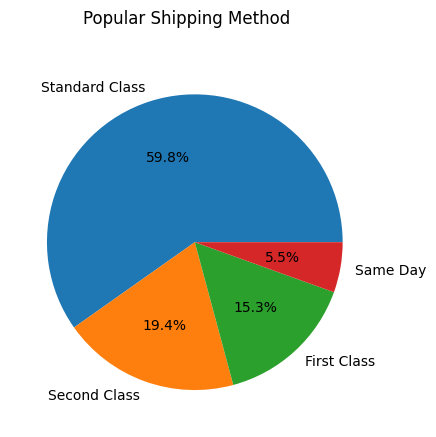

In [20]:
plt.pie(rename_columns['Use of Frequency'],labels=rename_columns['Mode of Shipment'], autopct='%1.1f%%')

plt.suptitle('Popular Shipping Method')

plt.show()

### Graphical Analysis

In [21]:
state = df['State'].value_counts().reset_index()
state = state.rename(columns = {'count': 'Number of Customers'})
print(state.head(10))

            State  Number of Customers
0      California                 1946
1        New York                 1097
2           Texas                  973
3    Pennsylvania                  582
4      Washington                  504
5        Illinois                  483
6            Ohio                  454
7         Florida                  373
8        Michigan                  253
9  North Carolina                  247


In [22]:
city = df['City'].value_counts().reset_index()

city = city.rename(columns = {'count': 'Number of Customers'})
print(city.head(10))

            City  Number of Customers
0  New York City                  891
1    Los Angeles                  728
2   Philadelphia                  532
3  San Francisco                  500
4        Seattle                  426
5        Houston                  374
6        Chicago                  308
7       Columbus                  221
8      San Diego                  170
9    Springfield                  161


In [23]:
#sale per state

state_sale = df.groupby(['State'])['Sales'].sum().reset_index()

top_state = state_sale.sort_values(by ='Sales',ascending = False)

print(top_state.head(10))

           State        Sales
3     California  446306.4635
30      New York  306361.1470
41         Texas  168572.5322
45    Washington  135206.8500
36  Pennsylvania  116276.6500
8        Florida   88436.5320
11      Illinois   79236.5170
20      Michigan   76136.0740
33          Ohio   75130.3500
44      Virginia   70636.7200


In [24]:
#sales by City
city_sale = df.groupby(['City'])['Sales'].sum().reset_index()

top_city = city_sale.sort_values(by ='Sales',ascending = False)

print(top_city.head(10).reset_index(drop=True))

            City        Sales
0  New York City  252462.5470
1    Los Angeles  173420.1810
2        Seattle  116106.3220
3  San Francisco  109041.1200
4   Philadelphia  108841.7490
5        Houston   63956.1428
6        Chicago   47820.1330
7      San Diego   47521.0290
8   Jacksonville   44713.1830
9        Detroit   42446.9440


### Product Analysis

In [25]:
products_category = df['Category'].unique()

print(products_category)

['Furniture' 'Office Supplies' 'Technology']


In [26]:
subcategory_count = df.groupby(['Category'])['Sub-Category'].nunique().reset_index()

subcategory_count = subcategory_count.sort_values(by = 'Sub-Category', ascending = False)

print(subcategory_count)

          Category  Sub-Category
1  Office Supplies             9
0        Furniture             4
2       Technology             4


In [27]:
category_sales = df.groupby(['Category'])['Sales'].sum().reset_index()

category_sales = category_sales.sort_values(by = 'Sales', ascending = False)

print(category_sales.reset_index(drop =True))

          Category        Sales
0       Technology  827455.8730
1        Furniture  728658.5757
2  Office Supplies  705422.3340


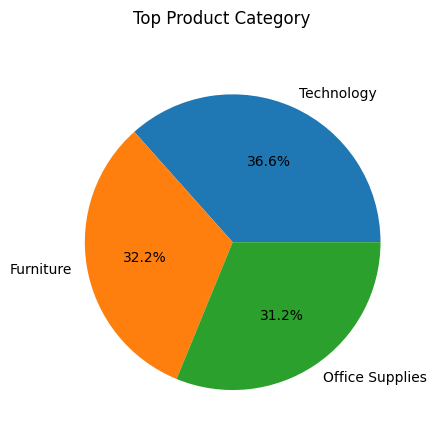

In [28]:
plt.pie(category_sales['Sales'],labels=category_sales['Category'], autopct='%1.1f%%')

plt.suptitle('Top Product Category ')

plt.show()

In [29]:
subcategory = df.groupby(['Sub-Category'])['Sales'].sum().reset_index()


#sorting in descending order

top_category = subcategory.sort_values(by = 'Sales', ascending = False)

print(top_category.head(10).reset_index(drop = True))

  Sub-Category        Sales
0       Phones  327782.4480
1       Chairs  322822.7310
2      Storage  219343.3920
3       Tables  202810.6280
4      Binders  200028.7850
5     Machines  189238.6310
6  Accessories  164186.7000
7      Copiers  146248.0940
8    Bookcases  113813.1987
9   Appliances  104618.4030


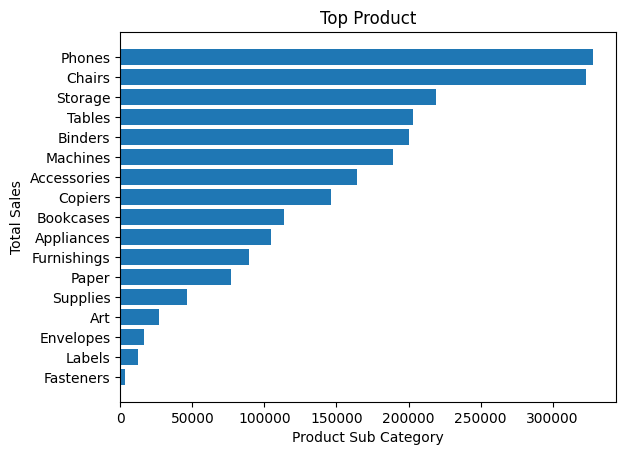

In [30]:
top_category2 = subcategory.sort_values(by = 'Sales', ascending = True)
plt.barh(top_category2['Sub-Category'],top_category2['Sales'])

plt.title('Top Product')
plt.xlabel('Product Sub Category')
plt.ylabel('Total Sales')

plt.show()

### Sales

In [31]:
#Converting Order Date to Datetime format

df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst = True)

yearly_sales  = df.groupby(df['Order Date'].dt.year)['Sales'].sum()

yearly_sales = yearly_sales.reset_index()
yearly_sales = yearly_sales.rename(columns={'Order Date':'Year','Sales':'Total Sales'})

print(yearly_sales)

   Year  Total Sales
0  2015  479856.2081
1  2016  459436.0054
2  2017  600192.5500
3  2018  722052.0192


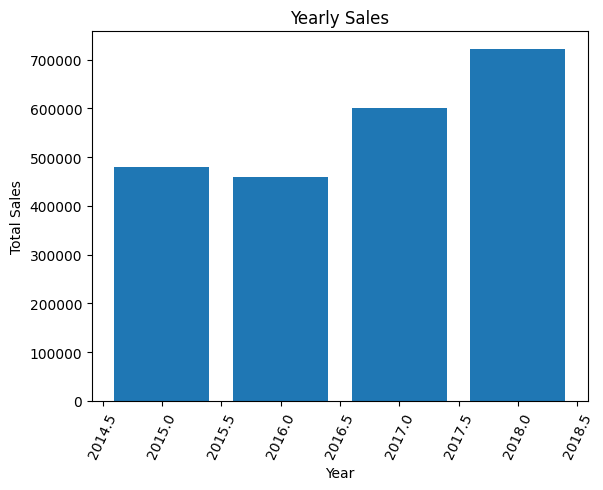

In [32]:
plt.bar(yearly_sales['Year'], yearly_sales['Total Sales'])

plt.title('Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Total Sales')

plt.xticks(rotation=65)

plt.show()

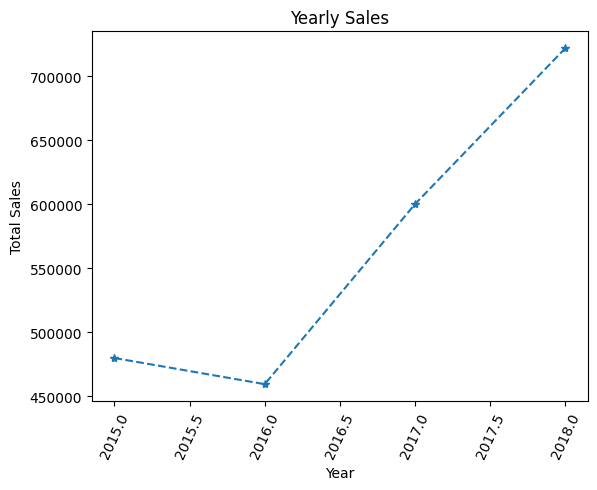

In [33]:
plt.plot(yearly_sales['Year'], yearly_sales['Total Sales'], marker = '*',linestyle = '--')

plt.title('Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Total Sales')

plt.xticks(rotation=65)

plt.show()

### Quarter Sales

In [34]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst = True)

yearly_sales  = df[df['Order Date'].dt.year == 2017]

quarter_sales = yearly_sales.resample('QE',on ='Order Date')['Sales'].sum()

quarter_sales = quarter_sales.reset_index()
quarter_sales = quarter_sales.rename(columns = {'Order Date' : 'Quarter', 'Sales' : 'Total Sales'})

print(quarter_sales)

     Quarter  Total Sales
0 2017-03-31   92686.3650
1 2017-06-30  135061.1610
2 2017-09-30  138056.3742
3 2017-12-31  234388.6498


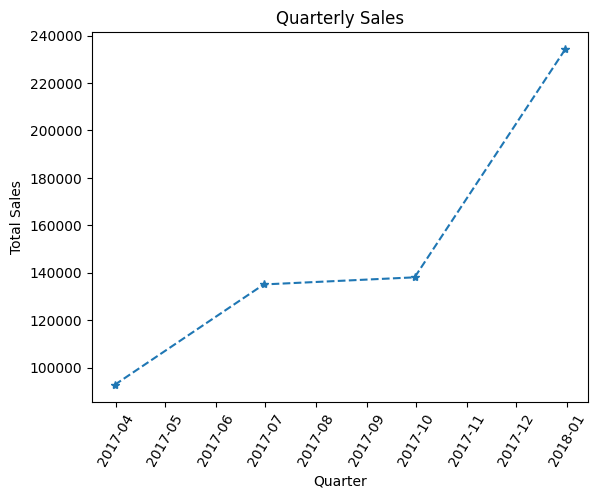

In [35]:
#plotting line graph

plt.plot(quarter_sales['Quarter'], quarter_sales['Total Sales'], marker = '*',linestyle = '--')

plt.title('Quarterly Sales')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')

plt.xticks(rotation=60)

plt.show()

### Monthly Sales Trend

In [36]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst = True)

year_sales  = df[df['Order Date'].dt.year == 2017]

monthly_sales = year_sales.resample('ME',on ='Order Date')['Sales'].sum()

monthly_sales = monthly_sales.reset_index()
monthly_sales = monthly_sales.rename(columns = {'Order Date' : 'Quarter', 'Sales' : 'Total Sales'})

print(monthly_sales)

      Quarter  Total Sales
0  2017-01-31   18542.4910
1  2017-02-28   22978.8150
2  2017-03-31   51165.0590
3  2017-04-30   38679.7670
4  2017-05-31   56656.9080
5  2017-06-30   39724.4860
6  2017-07-31   38320.7830
7  2017-08-31   30542.2003
8  2017-09-30   69193.3909
9  2017-10-31   59583.0330
10 2017-11-30   79066.4958
11 2017-12-31   95739.1210


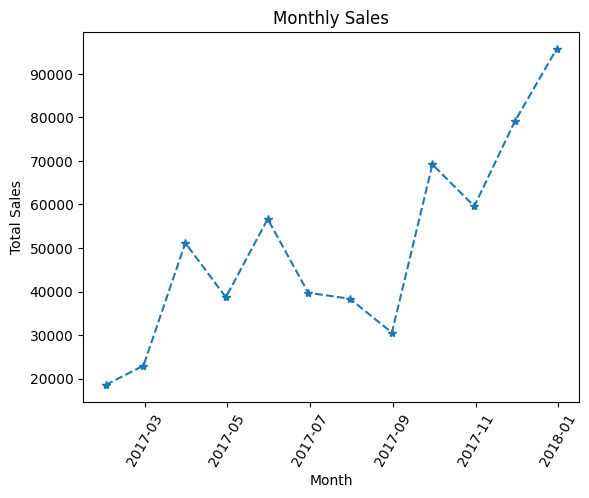

In [37]:
plt.plot(monthly_sales['Quarter'], monthly_sales['Total Sales'], marker = '*',linestyle = '--')

plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')

plt.xticks(rotation=60)

plt.show()